In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv("ML471_S1_Datafile_Concept.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,Consumption,Festivals/Special_events
0,1988-01-01,107.5052,6
1,1988-02-01,105.6720,1
2,1988-03-01,97.4502,1
3,1988-04-01,92.4714,1
4,1988-05-01,90.3151,1


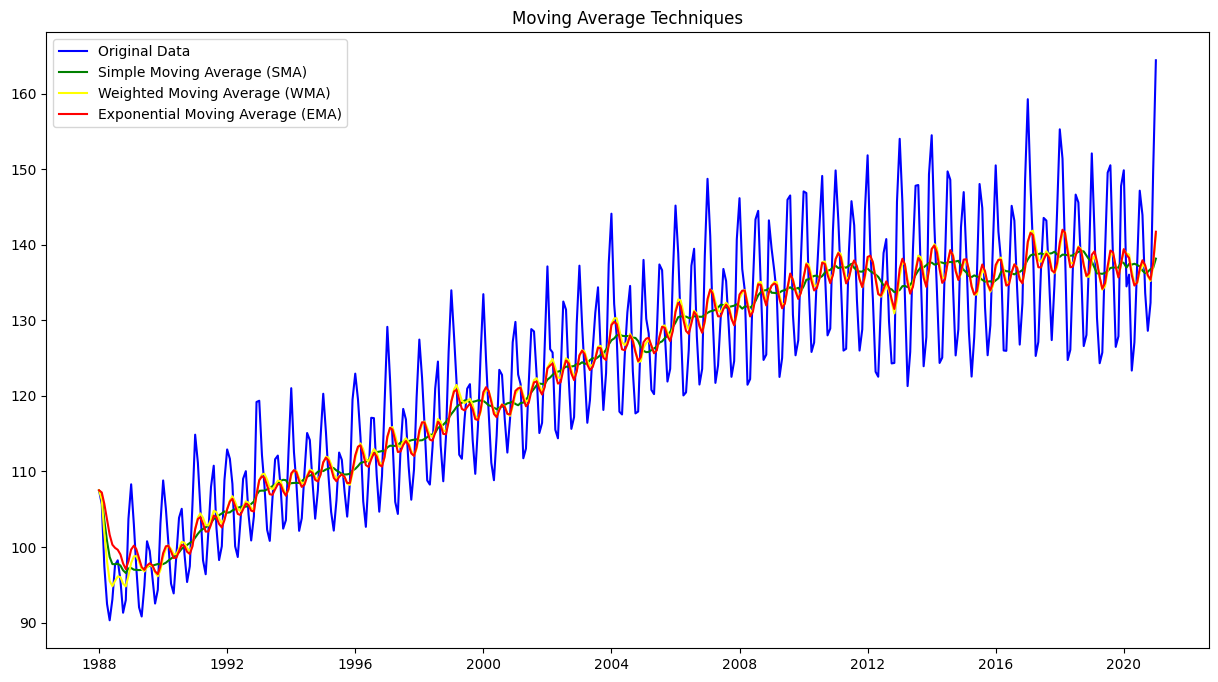

In [13]:
# Define window size for moving averages
window = 12

# 1. Simple Moving Average (SMA)
df['SMA'] = df['Consumption'].rolling(window=window, min_periods=1).mean()

# 2. Weighted Moving Average (WMA)
def calculate_wma(x):
    weights = np.arange(1, len(x) + 1)
    return np.dot(x, weights) / weights.sum()

df['WMA'] = df['Consumption'].rolling(window=window, min_periods=1).apply(calculate_wma, raw=True)

# 3. Exponential Moving Average (EMA)
df['EMA'] = df['Consumption'].ewm(span=window, adjust=False).mean()

# Plotting the results to match the reference graph
plt.figure(figsize=(15, 8))
plt.plot(df['DATE'], df['Consumption'], label='Original Data', color='blue')
plt.plot(df['DATE'], df['SMA'], label='Simple Moving Average (SMA)', color='green')
plt.plot(df['DATE'], df['WMA'], label='Weighted Moving Average (WMA)', color='yellow')
plt.plot(df['DATE'], df['EMA'], label='Exponential Moving Average (EMA)', color='red')

plt.title('Moving Average Techniques')
plt.legend()
plt.show()